# Reinforcement Learning

<img src="images/c1.png" style="width: 400px;"/>

<img src="images/data_incubator.png" style="width: 600px;"/>

# Introduction

- "A gazelle calf struggles to its feet minutes after being born. Half an hour later it is running at 20 miles per hour." - Sutton and Barto

<img src="images/gazelle.jpeg" style="width: 600px;"/>

- Google's AlphaGo used deep reinforcement learning in order to defeat world champion Lee Sedol at Go.

<img src="images/go.jpg" style="width: 600px;"/>

# Goal

- Agent interacts dynamically with its environment, moves from one state to another. 
- Based on the actions taken by the agent, rewards are given. 
- Guidelines for which action to take in each state is called a policy.
- Try to efficiently find an optimal policy in which rewards are maximized.


<img src="images/RL_diagram.png" style="width: 600px;">

## This is Different from Supervised Learning

* Supervised Learning
  * "learning from examples provided by a knowledgeable external supervisor"
  * For any state that the agent may be in, the supervisor can supply enough relevant examples of the outcomes which result from similar states so that we may make an accurate prediction.

* Reinforcement Learning
  * No supervisor exists
  * Agent must learn from experience as it explores the range of possible states
  * Continuously update policy in response to new information.

# Examples

<table class="table table-bordered">
<font size="4">
  <tr>
    <th>
      agent
    </th>
    <th>
      environment
    </th>
    <th>
      actions
    </th>
    <th>
      rewards
    </th>
    <th>
      policy
    </th>
  </tr>
  <tr>
    <td>
      robot arm
    </td>
    <td>
      set of arm positions
    </td>
    <td>
      bend elbow, close hand, extend arm, etc.
    </td>
    <td>
      reward when door successfully opened
    </td>
    <td>
      most efficient set of movements to open door
    </td>
  </tr>
  <tr>
    <td>
      board game player
    </td>
    <td>
      set of all game configs.
    </td>
    <td>
      legal moves
    </td>
    <td>
      winning the game
    </td>
    <td>
      optimal strategy
    </td>
  </tr>
  <tr>
    <td>
      mouse
    </td>
    <td>
      maze
    </td>
    <td>
      running, turning
    </td>
    <td>
      cheese
    </td>
    <td>
      most direct path to cheese
    </td>
  </tr>
  <tr>
    <td>
      credit card company
    </td>
    <td>
      set of all customers in default
    </td>
    <td>
      set of collections actions
    </td>
    <td>
      cost for each attempt, reward for successful collection
    </td>
    <td>
      optimal strategy for debt collections
    </td>
  </tr>
  <tr>
    <td>
      marketing team
    </td>
    <td>
      sets of potential customers and ads that can be shown
    </td>
    <td>
      showing an ad to a potential customer
    </td>
    <td>
      cost of placing ad, value of customer's business
    </td>
    <td>
      optimal ad placement strategy
    </td>
  </tr>
  <tr>
    <td>
      call center
    </td>
    <td>
      status of each customer in queue
    </td>
    <td>
      connecting customers to representatives
    </td>
    <td>
      customer satisfaction
    </td>
    <td>
      optimal queueing strategy
    </td>
  </tr>
  <tr>
    <td>
      Website Designer
    </td>
    <td>
      set of possible layout options
    </td>
    <td>
      changing layout
    </td>
    <td>
      increased click-through rate
    </td>
    <td>
      ideal layout
    </td>
  </tr>
  </font>
</table>

# Exploration vs Exploitation

- In the absence of a Supervisor, the agent must exlore the environment in order to gain information about rewards, while exploiting it's current information to maximize it's rewards.

- Balancing this tradeoff is a common theme

# Multi-Armed Bandits - A single state example

* Given N different arms to choose from, each with an unknown reward, what strategy should we use to explore and learn the values of each arm, while exploiting our current knowledge to maximize profit?
* This is a very common approach for optimizing online marketing campaigns.
* This can be thought of as a single-state reinforcement learning problem

<img src="images/MAB.jpg" style="width: 400px;"/>



## Epsilon-greedy

- A fraction (1 - $\epsilon$) of the time, choose the arm with the largest estimated value (exploit)
- The other $\epsilon$ of the time, chose a random arm (explore)
- Tune $\epsilon$ in order to balance tradeoff

<img src="images/epsilongreedy.png" style="width: 400px;"/>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

- Let true arm values be normally distributed with mean of 0, variance of 1
- Add a noise term to each reward, also normally distributed with mean of 0, variance of 1

In [2]:
class Bandit:
    def __init__(self):
        self.arm_values = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])  # keeps running average of rewards

A single experiment consists of pulling the arm Npulls times for a given 10 armed bandit.

In [3]:
def experiment(bandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history.append(R)
    return np.array(history)

Repeat experiment many times and look at the evolution of the rewards, averaged over all the experiments

In [4]:
Nexp = 500
Npulls = 3000

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)

for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0)
    bandit = Bandit()
    avg_outcome_eps0p01 += experiment(bandit,Npulls,0.01)
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1)

avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)

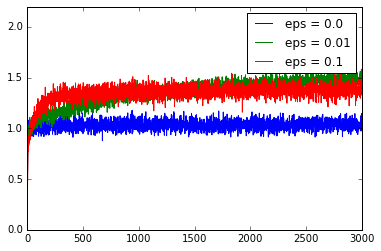

In [5]:
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p01,label="eps = 0.01")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.ylim(0,2.2)
plt.legend()
plt.show()

# Important Note

- A traditional AB test can be thought of as a multi-armed bandit algorithm, where we choose to exclusively explore during the initial testing phase, then abruptly switch to exclusively exploiting when we roll out.

# Dynamic Contextual Bandits

- Imagine that the value of the arms is changing dynamically
- Also imagine that each arm has N features that we can use to model the values
- Continuously test and update model while exploiting current knowledge

<img src="images/arm_values.png" style="width: 400px;"/>
<img src="images/bandit_dynamic.png" style="width: 400px;"/>


# Markov Decision Processes

* Generally, we consider Markov Decision Processes (MDPs), defined by
    * Set of all states and actions available to agent
    * Probability of transitions between states
    * For each transition, there is an expected reward for entering new state
    * Transition probability depends only on current state and action (Markov Property)
    * Environment's dynamics can be described by specifying

Pr{R<sub>t+1</sub> = r, S<sub>t+1</sub>=s' | S<sub>t</sub>, A<sub>t</sub>} for all r, s', S<sub>t</sub> and A<sub>t</sub>

## Dynamic Programming Approach

Solve Bellman Equation:

<img src="images/bellman.png" style="width: 800px;" />


* Assume that Environment is fully known
* System of algebraic equations - can be solved exactly
* Solution can be obtained directly (uncommon) or iteratively (e.g. "policy iteration" or "value iteration")
* Iterative approaches are more efficient and more common
* This approach is known as the "dynamic programming approach"
* Not used extensively in practice because of:
    * Computational expense
    * Assumption of a "perfect model" of the Environment

## Monte Carlo Approach

* Do not assume complete knowledge of the environment
* Sample sequences of states, actions, and rewards from on-line or simulated interaction with an environment
* For each state-action pair, compute average subsequent rewards over many "episodes"
* Value estimates are not updated on the basis of other value estimates – no "bootstrapping"


## Blackjack

* What is the optimal policy when playing Blackjack?
* What is the expected future reward in each state?

<img src="images/blackjack.png" style="width: 1000px;"/>

## Temporal-Difference Learning

* Combine Monte Carlo ideas and dynamic programming ideas.
* Still do not assume complete knowledge of the environment
* Update estimates based in part on other learned estimates (bootstrapping)
* Probably most common algorithm is known as "Q-learning"


## Maze

What is the optimal policy for navigating the maze, with a reward given for moving into the state marked with a white spot?

<img src="images/maze.png" style="width: 800px;"/>

## Collections Game

<img src="images/MyGame.png" style="width: 800px;"/>

* Each individual owes \$40, and will pay if they are asked &#952; times.
* Each time we ask, it costs us \$1.
* We don't know the distribution of &#952; a priori.
* Can we learn what the best collections strategy is?
* Can we learn what the expected reward is for any given state?

# Streaming Example - Twitter Bandit

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from IPython import display
import tweepy
import random
import sys

# Establish Twitter Stream

Make sure that you have a keys.txt file containing the necessary access tokens. Sign up [here](https://dev.twitter.com/) to get these.

In [7]:
keyFile = open('keys.txt', 'r')
consumer_key = keyFile.readline().rstrip()
consumer_secret = keyFile.readline().rstrip()
access_token = keyFile.readline().rstrip()
access_token_secret = keyFile.readline().rstrip()
keyFile.close()

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### Epsilon Greedy

In [8]:
class BanditEpsGreedy(object):
    """
    Use Epsilon-Greedy Method
    """
    def __init__(self,keys,init,epsilon=0.1):
        self.epsilon = epsilon
        self.ActionValue = {}
        for key in keys:
            self.ActionValue[key] = init

    def get_reward(self,action,text):
        if any(x in text for x in action):
            return 1
        else:
            return 0

    def choose_action(self):
        """
        For 1-epsilon of the time, choose the action with the highest estimated value.
        For epsilon of the time, randomly choose an action
        """
        random_num = np.random.rand()
        if random_num<self.epsilon:
            return random.choice(self.ActionValue.keys())
        else:
            return max(self.ActionValue, key=lambda x:self.ActionValue.get(x)[1])
    
    def update(self,action,reward):
        """
        Update estimated value by keeping running average of rewards for each action
        """
        K = self.ActionValue[action][0]
        Value = self.ActionValue[action][1]
        K += 1
        alpha = 1./K
        Value += alpha * (reward - Value)
        self.ActionValue[action] = (K,Value)
        
    def plotme(self):
        """
        Display results
        """
        display.clear_output(wait=True)
        for key in self.ActionValue:
            print(str.format('action: {0}, Value: {1:.2f}, K: {2}', key,self.ActionValue[key][1],self.ActionValue[key][0]))



### Randomized Probability Matching

In [9]:
class BanditRPM(object):
    def __init__(self,keys,init):
        self.ActionValue = {}
        for key in keys:
            self.ActionValue[key] = init

    def get_reward(self,action,text):
        if any(x in text for x in action):
            return 1
        else:
            return 0
    
    def choose_action(self):
        """
        Use Thompson sampling to choose action. Sample from each posterior and choose the max of the samples.
        """
        samples = {}
        for key in self.ActionValue:
            samples[key] = np.random.beta(self.ActionValue[key][0], self.ActionValue[key][1])
        return max(samples, key=samples.get)

    def update(self,action,reward):
        """
        Update parameters of posteriors, which are Beta distributions
        """
        a, b = self.ActionValue[action]
        self.ActionValue[action] = (a+reward, b + 1 - reward)
        
    def plotme(self):
        """
        Display results
        """
        f = plt.figure()
        f.canvas.draw()
        plt.xlim(0,0.6)
        x = np.linspace(0,.6,100)
        for key in self.ActionValue:
            a = self.ActionValue[key][0]
            b = self.ActionValue[key][1]
            y = ss.beta.pdf(x, a,b)
    
            plt.plot(x,y,label=key)
        plt.ylim(0,30)
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())
               

### Run Experiment on Twitter Stream

* Each time a tweet comes in, we will choose which "arm" to pull by guessing what word(s) may appear in the tweet. This choice is referred to as an "action", and we use the get_action() method to make the choice.
* If we are correct, we get a reward. The reward is calculated by the get_reward() method.
* We use the information on our chosen action and reward received to update our beliefs about the values of the arms, which are stored in ActionValue.

In [10]:
class StreamWatcherHandler(tweepy.StreamListener):
    """ Handles all incoming tweets as discrete tweet objects.
    """
    
    def __init__(self,bandit):
        super(StreamWatcherHandler, self).__init__()
        self.bandit = bandit
 
    def on_status(self, status):
        """Called when status (tweet) object received.
        """
        action = self.bandit.choose_action()
        reward = self.bandit.get_reward(action,status.text.strip().lower())
        self.bandit.update(action,reward)
        self.bandit.plotme()
        return True
    
    def on_error(self, status):
        print status


### Epsilon Greedy

In [11]:
bandit = BanditEpsGreedy([('hillary','clinton'),('donald','trump'),('bernie','sanders')],(0,0.))
swh = StreamWatcherHandler(bandit)
stream = tweepy.Stream(auth, swh)
try:
    stream.filter(track=['election', 'president'])
except KeyboardInterrupt:
    sys.exit(0)

action: ('donald', 'trump'), Value: 0.27, K: 15
action: ('hillary', 'clinton'), Value: 0.00, K: 0
action: ('bernie', 'sanders'), Value: 0.00, K: 1


SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


### Randomized Probability Matching

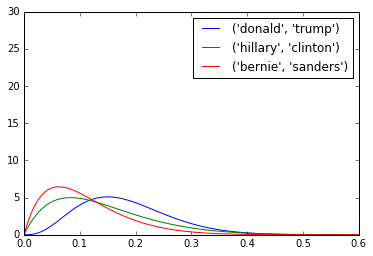

SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


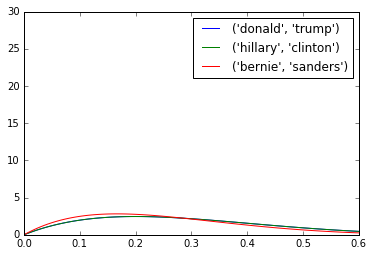

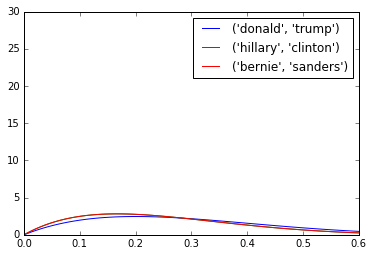

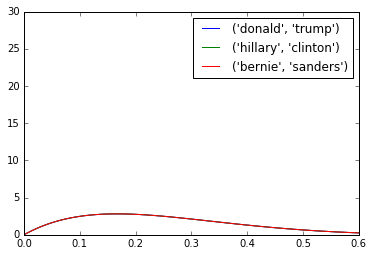

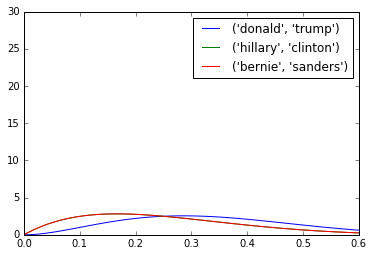

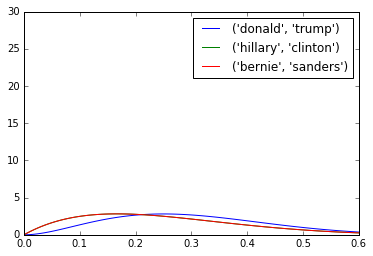

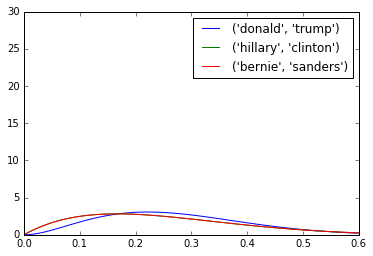

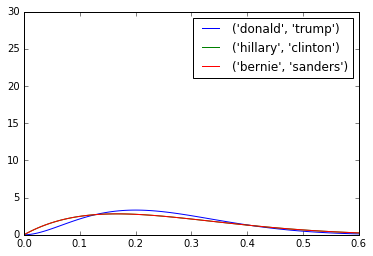

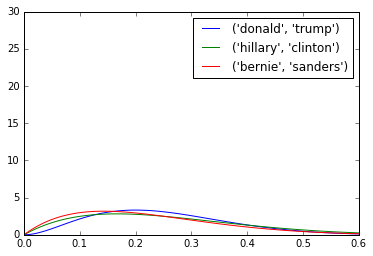

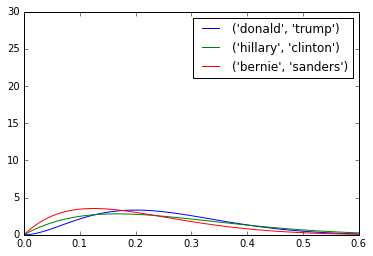

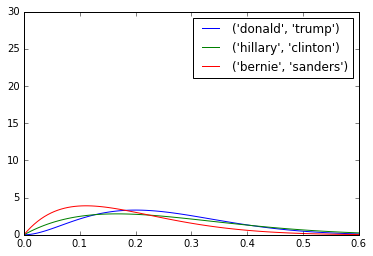

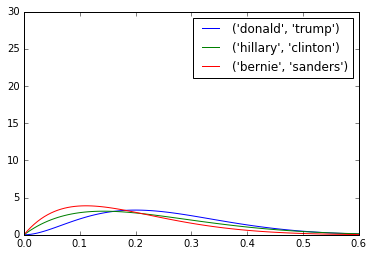

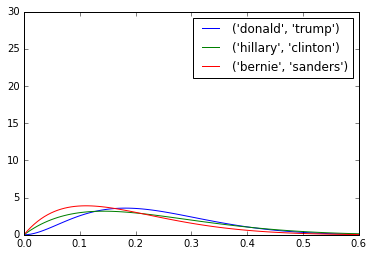

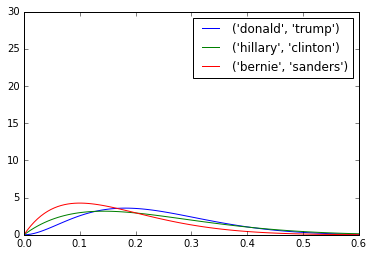

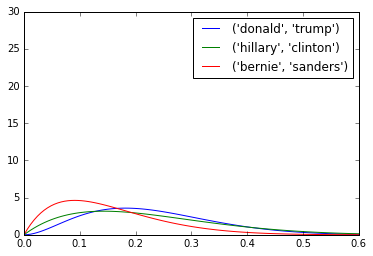

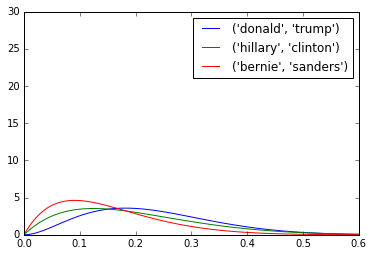

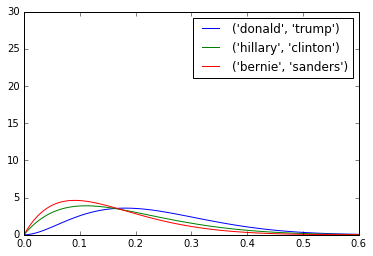

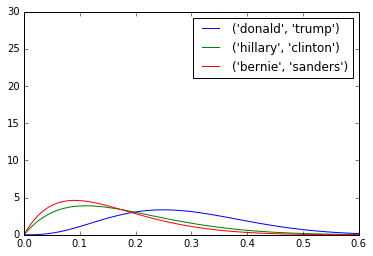

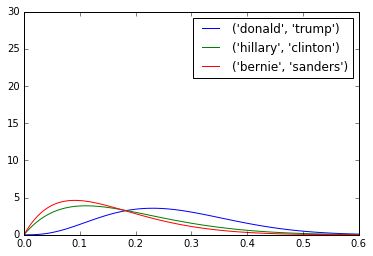

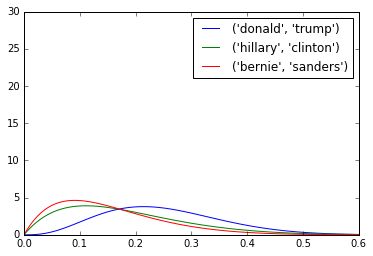

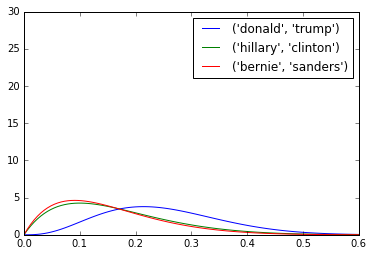

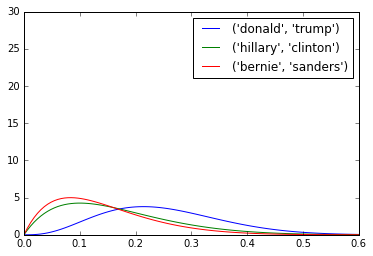

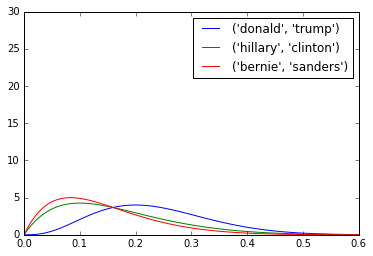

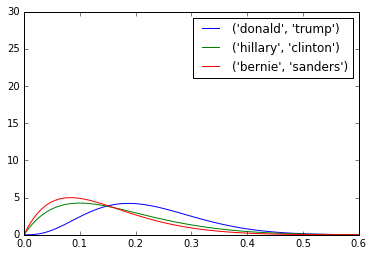

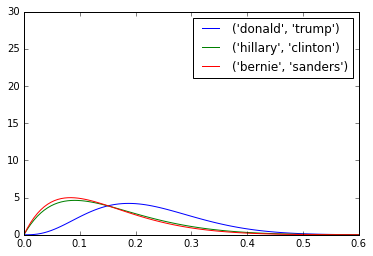

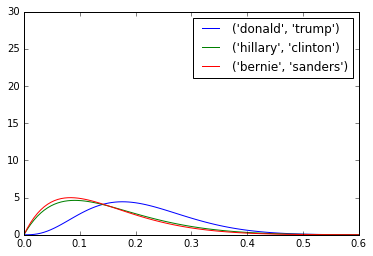

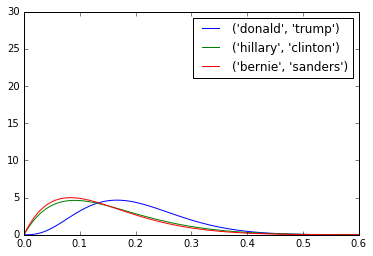

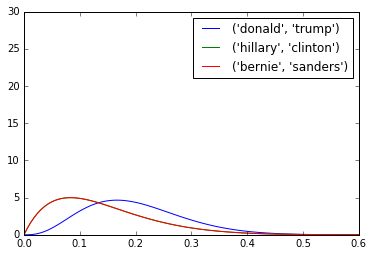

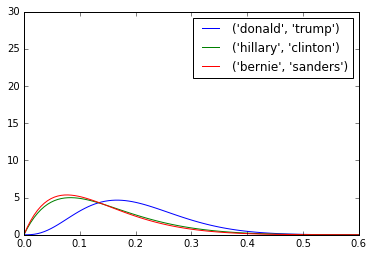

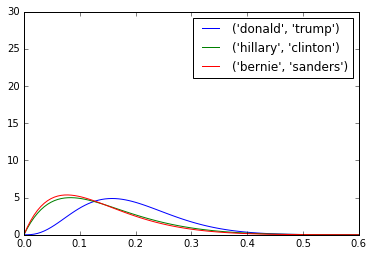

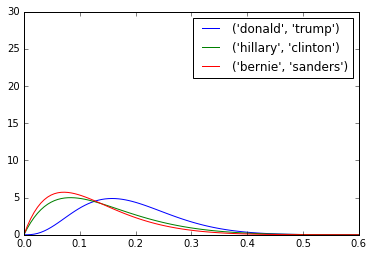

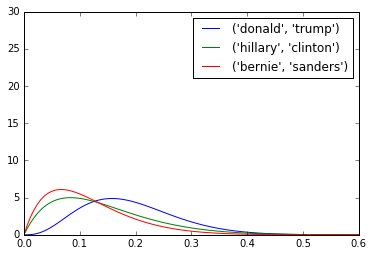

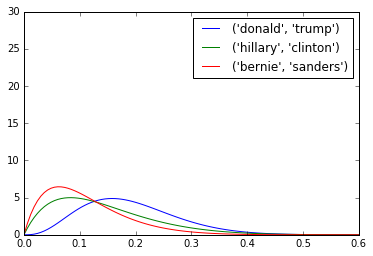

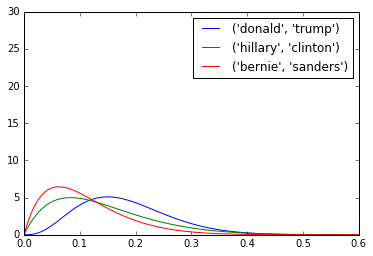

In [12]:
bandit = BanditRPM([('hillary','clinton'),('donald','trump'),('bernie','sanders')],(2,5))
swh = StreamWatcherHandler(bandit)
stream = tweepy.Stream(auth, swh)
try:
    stream.filter(track=['election', 'president'])
except KeyboardInterrupt:
    sys.exit(0)

## Example: Article Recommendation Engine
## Yahoo! Labs

"A Contextual-Bandit Approach to Personalized News Article Recommendation"

(Li et al, 2012)

* Challenge: Adapt advertisements, news articles, etc. to individual users based on content and user information
* Solution: Model personalized recommendation of news articles as a contextual bandit problem
* Tested algorithm on Yahoo! Front Page Today Module dataset containing over 33 million events
* Found 12.5% click lift compared to a standard context-free bandit algorithm
* Argue that any bandit algorithm can be reliably evaluated offline using previously recorded random traffic

## Example: Reinforcement Learning for NY State Tax Collection

"Optimizing Debt Collections Using Constrained Reinforcement Learning"

(Abe et al, 2010)

* Challenge: Optimize the debt collections process for NY state taxes.
* Solution: Model as a Markov Decision Process
* Find optimal solution using advantage updating (extension of standard Q-learning)
* Apply function approximation using segmented linear regression
* Outperforms standard approach of combining data modeling and constrained optimization
* State expects savings of about 100 million dollars in the next three years

## Example: Google Analytics Content Experiments

* Provides a framework for testing up to 10 versions of a single page.
* Uses Multi-Armed Bandits under the hood
* Overview of methods provided [here](https://support.google.com/analytics/answer/2844870?hl=en&ref_topic=1745207)
* Written by Steven L Scott, Senior Economic Analyst at Google and former Director of Statistical Analysis at Capital One